# Pandas

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

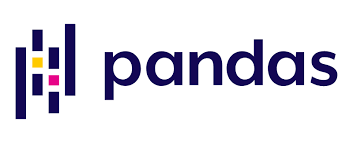

Pandas is one (if not the most) of the most used library to work in Data Science. This library is very useful and efficient especially when we works with tables and time series.

In this notebook we will practice the most used pandas commands to do our job as Data Scientist the best way (and efficient) possible.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Creating, Reading and Writing

### i. Creating

In [3]:
df = pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

In [4]:
df

,Yes,No
0,50,131
1,21,2


In [5]:
df = pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

In [6]:
df

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


In [7]:
df = pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index = ['Product A', 'Product B'])

In [8]:
df

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


In [9]:
col = pd.Series([30, 35, 40], index = ['2015 Sales', '2016 Sales', '2017 Sales'], name = 'Product A')

In [10]:
col

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

### ii. Reading

In [11]:
!pip install -q xlrd
!pip install -q openpyxl

In [12]:
df = pd.read_excel('Indicador.xls', skiprows = 3, index_col = False) # Read excel

WARNING *** file size (60295) not 512 + multiple of sector size (512)


In [13]:
df.head()

,Dia,Valor
0,2023-01-01,35122.26
1,2023-01-02,35133.53
2,2023-01-03,35144.81
3,2023-01-04,35156.09
4,2023-01-05,35167.38


In [14]:
df = pd.read_excel('Indicador.xls', skiprows = 3, index_col = 0)

WARNING *** file size (60295) not 512 + multiple of sector size (512)


In [15]:
df.head()

,Valor
Dia,
2023-01-01,35122.26
2023-01-02,35133.53
2023-01-03,35144.81
2023-01-04,35156.09
2023-01-05,35167.38


In [16]:
df = pd.read_excel('Indicador.xls', skiprows = 3, index_col = 'Dia')

WARNING *** file size (60295) not 512 + multiple of sector size (512)


In [17]:
df.head()

,Valor
Dia,
2023-01-01,35122.26
2023-01-02,35133.53
2023-01-03,35144.81
2023-01-04,35156.09
2023-01-05,35167.38


In [18]:
df_1 = pd.read_excel('Excel_File.xlsx', sheet_name = 'Sheet_Number_1') # Read particular sheet

In [19]:
df_2 = pd.read_excel('Excel_File.xlsx', sheet_name = 'Sheet_Number_2')

In [20]:
df_1

,Column 1,Column 2
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [21]:
df_2

,Column 3,Column 4
0,11,16
1,12,17
2,13,18
3,14,19
4,15,20


In [22]:
df = pd.read_csv('netflix_titles.csv') # Read .csv

### 3. Writing

In [23]:
df_1.to_csv('file_1.csv', index = False) # To .csv

In [24]:
df_2.to_excel('file_2.xlsx', index = False) # To .xlsx

In [25]:
with pd.ExcelWriter('new_file.xlsx') as writer:  
    df_1.to_excel(writer, sheet_name='Sheet_name_1')
    df_2.to_excel(writer, sheet_name='Sheet_name_2')

# 2. Indexing, Selecting and Assigning

In [26]:
df = pd.read_csv('netflix_titles.csv')

### i. Call a specific column

In [27]:
df['title']

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8807, dtype: object

In [28]:
df.title

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8807, dtype: object

### ii. Call a specific element from a specific columns

In [29]:
df['title'][0]

'Dick Johnson Is Dead'

This commands works just because the index = 0 exists. The correct way to call the first element is:

In [30]:
df['title'].iloc[0]

'Dick Johnson Is Dead'

In [31]:
df['title'].loc[0]

'Dick Johnson Is Dead'

### iii. Call a specific columns associated to a index

In [32]:
df.iloc[:, 0]

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object

In [33]:
df.iloc[:3, 0]

0    s1
1    s2
2    s3
Name: show_id, dtype: object

In [34]:
df.iloc[1:3, 0]

1    s2
2    s3
Name: show_id, dtype: object

In [35]:
df.iloc[-3:, 0]

8804    s8805
8805    s8806
8806    s8807
Name: show_id, dtype: object

In [36]:
df.iloc[[0, 1, 2], 0]

0    s1
1    s2
2    s3
Name: show_id, dtype: object

In [37]:
df.iloc[-5:] # When the commands only have one argument its refer to rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### iv. Label based location

In [38]:
df.loc[0, 'title']

'Dick Johnson Is Dead'

In [39]:
df.loc[:, ['title', 'director']]

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN
...,...,...
8802,Zodiac,David Fincher
8803,Zombie Dumb,NaN
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


**Diffrence between .iloc and .loc**

iloc uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So 0:10 will select entries 0,...,9. 

loc, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

### v. Manipulating the indexes

In [40]:
df = df.set_index('show_id')

In [41]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### vi. Conditional selection

In [42]:
df[df['director'] == 'Rajiv Chilaka']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...


In [43]:
df.loc[df['director'] == 'Rajiv Chilaka']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...


In [44]:
df[(df['country'] == 'United States') & (df['release_year'] == 2021)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,"September 16, 2021",2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...
s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,"September 15, 2021",2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...
s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
...,...,...,...,...,...,...,...,...,...,...,...
s1450,TV Show,Dream Home Makeover,NaN,NaN,United States,"January 1, 2021",2021,TV-G,2 Seasons,Reality TV,Dreams come true for real families looking for...
s1456,TV Show,Headspace Guide to Meditation,NaN,Andy Puddicombe,United States,"January 1, 2021",2021,TV-G,1 Season,"Docuseries, Science & Nature TV","Headspace takes a friendly, animated look at t..."
s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,"January 1, 2021",2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...


In [45]:
df.loc[(df['country'] == 'United States') & (df['release_year'] == 2021)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,"September 16, 2021",2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...
s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,"September 15, 2021",2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...
s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
...,...,...,...,...,...,...,...,...,...,...,...
s1450,TV Show,Dream Home Makeover,NaN,NaN,United States,"January 1, 2021",2021,TV-G,2 Seasons,Reality TV,Dreams come true for real families looking for...
s1456,TV Show,Headspace Guide to Meditation,NaN,Andy Puddicombe,United States,"January 1, 2021",2021,TV-G,1 Season,"Docuseries, Science & Nature TV","Headspace takes a friendly, animated look at t..."
s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,"January 1, 2021",2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...


In [46]:
df[(df['country'] == 'United States') | (df['release_year'] == 2021)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


In [47]:
df[df['country'].isin(['United States', 'India'])]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...
s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


**View not nulls**

In [48]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [49]:
df[df['country'].notnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


### vii. Assigning data

In [50]:
df['origin'] = 'Kaggle'

In [51]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,origin
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kaggle
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Kaggle
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Kaggle
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Kaggle
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Kaggle


In [52]:
df.index = range(len(df), 0, -1)

In [53]:
df.tail() # Show the last elements

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,origin
5,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Kaggle
4,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Kaggle
3,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Kaggle
2,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Kaggle
1,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Kaggle


### viii. Create columns and assign values

In [54]:
df.shape

(8807, 12)

In [55]:
col = []

for i in range(len(df)):
    col.append(i)

col = pd.Series(col)
    

In [56]:
col

0          0
1          1
2          2
3          3
4          4
        ... 
8802    8802
8803    8803
8804    8804
8805    8805
8806    8806
Length: 8807, dtype: int64

You can see all values is associated at the same number of index

In [57]:
df['new_column'] = col

In [58]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,origin,new_column
8807,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kaggle,NaN
8806,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Kaggle,8806.0
8805,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Kaggle,8805.0
8804,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Kaggle,8804.0
8803,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Kaggle,8803.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Kaggle,5.0
4,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Kaggle,4.0
3,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Kaggle,3.0
2,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Kaggle,2.0


You can see the assign is index to index, and also you can see the index 8807 is not relationated to no-values and the value in the column remains as null

### ix. Work with dates (Columns)

In [59]:
import time
import datetime
from dateutil.relativedelta import relativedelta

In [60]:
df['date'] = '01-01-2023'

Transform to date_time with a specif format

In [61]:
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y')

In [62]:
df['date'].iloc[0]

Timestamp('2023-01-01 00:00:00')

In [63]:
df['date'].iloc[0].year

2023

In [64]:
df['date'].iloc[0].month

1

In [65]:
df['date'].iloc[0].day

1

In [66]:
df['date'].iloc[0].hour

0

In [67]:
df['date_2'] = '01-07-2022'

In [68]:
df['date_2'] = pd.to_datetime(df['date_2'], format = '%d-%m-%Y')

Subtracting two dates

In [69]:
df['diff'] = df['date'] - df['date_2']

In [70]:
df['diff'].head()

8807   184 days
8806   184 days
8805   184 days
8804   184 days
8803   184 days
Name: diff, dtype: timedelta64[ns]

In [71]:
df['diff'].iloc[0]

Timedelta('184 days 00:00:00')

Create a relative delta to add to all the dates

In [72]:
df['RD'] = relativedelta(months = 2)

In [73]:
df['date_3'] = df['date'] + df['RD']

In [74]:
df['date_3'].head()

8807   2023-03-01
8806   2023-03-01
8805   2023-03-01
8804   2023-03-01
8803   2023-03-01
Name: date_3, dtype: datetime64[ns]

Create column with the year of the column "date"

In [75]:
df['year'] = df['date'].dt.year

In [76]:
df['year'].head()

8807    2023
8806    2023
8805    2023
8804    2023
8803    2023
Name: year, dtype: int64

### x. Work with dates (Values)

In [77]:
date = datetime.datetime.strptime('2023-04-01', '%Y-%m-%d')

In [78]:
date.year

2023

In [79]:
date.month

4

In [80]:
date.day

1

In [81]:
date.hour

0

In [82]:
date - relativedelta(months = 1)

datetime.datetime(2023, 3, 1, 0, 0)

Is very important use **months** instead **month** in relative delta

### xi. Another to work with dates (values)

In [220]:
year_1 = 2022
month_1 = 9
day_1 = 30

year_2 = 2021
month_2 = 1
day_2 = 2

date_1 = datetime.datetime(year_1, month_1, day_1)
date_2 = datetime.datetime(year_2, month_2, day_2)

In [221]:
date_1 - date_2

datetime.timedelta(days=636)

### xii. Concat

In [83]:
df_1 = pd.read_csv('netflix_titles.csv')
df_2 = pd.read_csv('netflix_titles.csv')

In [84]:
df_3 = pd.concat([df_1, df_2], axis = 0)
df_3 = df_3.reset_index()

Is very important reset index because when we concat it keep the index of the all DF which you concat

### xiii. Date Range

In [85]:
pd.date_range(start='1-4-2018', periods=5, freq='M') # DEFAULT FORMAT = 'MM-DD-YYYY' or 'DD-MM-YYYY'

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31'],
              dtype='datetime64[ns]', freq='M')

In [86]:
pd.date_range(start='2017-01-01', end='2017-12-31', inclusive="both", freq='M') # DEFAULT FORMAT = 'YYYY-MM-DD' or 'YYYY-MM-DD'

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [87]:
dr = pd.date_range(start='2017-01-01', end='2017-12-31', inclusive="both", freq='M')

In [88]:
dr = list(dr)

In [89]:
dr[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [90]:
dr[0].year

2017

In [91]:
dr[0].month

1

In [92]:
dr[0].day

31

In [93]:
dr[0] - relativedelta(months = 12)

Timestamp('2016-01-31 00:00:00', freq='M')

In [94]:
pd.date_range(start='2017-01-01', end='2017-12-31', inclusive="left", freq='M')

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='M')

# 3. Summary functions and Maps

In [95]:
df = pd.read_csv('netflix_titles.csv')

In [96]:
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [97]:
df['release_year'].mean()

2014.1801975701146

In [98]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [99]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

### i. Maps

In [100]:
ry_mean = df['release_year'].mean()

In [101]:
ry_mean

2014.1801975701146

In [102]:
df['new_release_year'] = df['release_year']

In [103]:
df['new_release_year'] = df['new_release_year'].map(lambda x: x - ry_mean)

In [104]:
df['new_release_year']

0       5.819802
1       6.819802
2       6.819802
3       6.819802
4       6.819802
          ...   
8802   -7.180198
8803    3.819802
8804   -5.180198
8805   -8.180198
8806    0.819802
Name: new_release_year, Length: 8807, dtype: float64

**Apply** if for all the rows

In [105]:
df = pd.read_csv('netflix_titles.csv')
df['new_release_year'] = df['release_year']

In [106]:
def substract_mean(x):

    x['release_year'] = x['release_year'] - ry_mean

    return x

In [107]:
df = df.apply(substract_mean, axis = 'columns')

In [108]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",5.819802,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",6.819802,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",6.819802,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",6.819802,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",6.819802,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",-7.180198,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2007
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",3.819802,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2018
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",-5.180198,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2009
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",-8.180198,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2006


In [109]:
df['new_columns'] = df.apply(lambda x: x['release_year']/x['new_release_year'], axis = 1)

In [110]:
df['new_columns']

0       0.002881
1       0.003374
2       0.003374
3       0.003374
4       0.003374
          ...   
8802   -0.003578
8803    0.001893
8804   -0.002578
8805   -0.004078
8806    0.000407
Name: new_columns, Length: 8807, dtype: float64

In [111]:
df['country_director'] = df['country'] + '_' + df['director']

In [112]:
df[['country', 'director', 'country_director']].head()

,country,director,country_director
0,United States,Kirsten Johnson,United States_Kirsten Johnson
1,South Africa,NaN,NaN
2,NaN,Julien Leclercq,NaN
3,NaN,NaN,NaN
4,India,NaN,NaN


# 4. Grouping and Sorting

In [113]:
df = pd.read_csv('netflix_titles.csv')

In [114]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [115]:
df.groupby('country')['country'].count() # Equivalent to value_counts()

country
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Name: country, Length: 748, dtype: int64

In [116]:
(df['country'] == 'Argentina').sum()

56

### i. Extract the minimum year associated to each country

**First way:**

In [117]:
df.groupby('country', as_index = False)['release_year'].min()

,country,release_year
0,", France, Algeria",2014
1,", South Korea",2021
2,Argentina,1985
3,"Argentina, Brazil, France, Poland, Germany, De...",2017
4,"Argentina, Chile",2006
...,...,...
743,Venezuela,2017
744,"Venezuela, Colombia",2007
745,Vietnam,2014
746,West Germany,1977


**Second way:**

In [118]:
df.sort_values(by = ['release_year'], ascending = True, inplace = True)
df.drop_duplicates(subset = ['country'], keep = 'first', inplace = True)
df.sort_values(by = ['country'], ascending = True, inplace = True)

In [119]:
df[['country', 'release_year']]

,country,release_year
365,", France, Algeria",2014
193,", South Korea",2021
6705,Argentina,1985
4947,"Argentina, Brazil, France, Poland, Germany, De...",2017
1261,"Argentina, Chile",2006
...,...,...
7692,"Venezuela, Colombia",2007
6527,Vietnam,2014
5612,West Germany,1977
2446,Zimbabwe,2017


### ii. Extract the first director for each country

In [120]:
df = pd.read_csv('netflix_titles.csv')

In [121]:
df.groupby('country', as_index = False).apply(lambda x: x['director'].iloc[0])

,country,None
0,", France, Algeria",Najwa Najjar
1,", South Korea",NaN
2,Argentina,NaN
3,"Argentina, Brazil, France, Poland, Germany, De...",Diego Lerman
4,"Argentina, Chile",Pablo Larraín
...,...,...
743,Venezuela,Matías Gueilburt
744,"Venezuela, Colombia",Jorge Granier
745,Vietnam,Victor Vu
746,West Germany,"Joachim Fest, Christian Herrendoerfer"


### iii. Extract the last director for each country

In [122]:
df.groupby('country', as_index = False).apply(lambda x: x['director'].iloc[-1])

,country,None
0,", France, Algeria",Najwa Najjar
1,", South Korea",NaN
2,Argentina,Esteban Sapir
3,"Argentina, Brazil, France, Poland, Germany, De...",Diego Lerman
4,"Argentina, Chile","Cecilia Atán, Valeria Pivato"
...,...,...
743,Venezuela,Matías Gueilburt
744,"Venezuela, Colombia",Jorge Granier
745,Vietnam,Dustin Nguyen
746,West Germany,"Joachim Fest, Christian Herrendoerfer"


### iv. Extract the maximum year of release for each ('country', 'director') tuple (Keeping the others element of the row)

In [123]:
df_max_cd = df.groupby(by = ['country', 'director'], as_index = False).apply(lambda x: x.loc[x['release_year'].idxmax()])

In [124]:
df_max_cd

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s366,Movie,Eyes of a Thief,Najwa Najjar,"Khaled Abol El Naga, Souad Massi, Suhail Hadda...",", France, Algeria","July 30, 2021",2014,TV-14,103 min,"Dramas, Independent Movies, International Movies","After a decade in prison, a Palestinian man wi..."
1,s770,Movie,From Stress to Happiness,"Alejandro De Grazia, Juan Stadler",NaN,Argentina,"June 3, 2021",2020,TV-G,58 min,"Documentaries, International Movies",A stressed-out documentary filmmaker goes on a...
2,s304,Movie,Esperando la carroza,Alejandro Doria,"Luis Brandoni, China Zorrilla, Antonio Gasalla...",Argentina,"August 5, 2021",1985,TV-MA,95 min,"Comedies, Cult Movies, International Movies",Cora has three sons and a daughter and she´s a...
3,s1734,TV Show,Carmel: Who Killed Maria Marta?,Alejandro Hartmann,NaN,Argentina,"November 5, 2020",2020,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","A woman is found dead in her bathtub, with a p..."
4,s2466,Movie,Intuition,Alejandro Montiel,"Luisana Lopilato, Joaquín Furriel, Rafael Ferr...",Argentina,"May 28, 2020",2020,TV-MA,116 min,"Dramas, International Movies, Thrillers",Police officer Pipa works on her first big cas...
...,...,...,...,...,...,...,...,...,...,...,...,...
4647,s2058,Movie,Sky Tour: The Movie,Nguyen Thanh Tung,Son Tung M-TP,Vietnam,"September 2, 2020",2020,TV-G,93 min,"Documentaries, International Movies, Music & M...","From the preparations to the performances, thi..."
4648,s6528,Movie,Conjuring Spirit,Van M. Pham,"Phuong Mai, Quang Su, Hoang Phuc Nguyen, Chi P...",Vietnam,"August 28, 2018",2014,TV-MA,112 min,"Horror Movies, International Movies, Thrillers","In the wake of her husband's betrayal, a novel..."
4649,s570,Movie,Dreamy Eyes,Victor Vu,"Tran Nghia, Truc Anh, Tran Phong, Khanh Van, N...",Vietnam,"July 1, 2021",2019,TV-14,117 min,"Dramas, International Movies, Romantic Movies","Through heartbreak and betrayal, Ngan's unrequ..."
4650,s5613,Movie,Hitler - A Career,"Joachim Fest, Christian Herrendoerfer",NaN,West Germany,"February 10, 2017",1977,TV-MA,150 min,"Documentaries, International Movies",This documentary examines how Adolf Hitler's t...


**Check**

In [125]:
df[(df['country'] == 'United States') & (df['director'] == 'Marcus Raboy')]['release_year'].head()

2507    2020
2849    2020
3776    2019
3877    2019
4314    2018
Name: release_year, dtype: int64

In [126]:
df[(df['country'] == 'United States') & (df['director'] == 'Marcus Raboy')]['release_year'].max()

2020

In [127]:
df_max_cd[(df_max_cd['country'] == 'United States') & (df_max_cd['director'] == 'Marcus Raboy')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3709,s2508,TV Show,Patton Oswalt: I Love Everything,Marcus Raboy,"Patton Oswalt, Bob Rubin",United States,"May 19, 2020",2020,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Turning 50. Finding love again. Buying a house...


### v. Extract more than one metric for a column

In [128]:
df_3m = df.groupby(by = ['country'], as_index = False)['release_year'].agg(['max', 'min', 'mean'])

In [129]:
df_3m

,max,min,mean
country,,,
", France, Algeria",2014,2014,2014.000000
", South Korea",2021,2021,2021.000000
Argentina,2021,1985,2016.000000
"Argentina, Brazil, France, Poland, Germany, Denmark",2017,2017,2017.000000
"Argentina, Chile",2017,2006,2011.500000
...,...,...,...
Venezuela,2017,2017,2017.000000
"Venezuela, Colombia",2007,2007,2007.000000
Vietnam,2021,2014,2017.714286


In [130]:
df_3m.reset_index(inplace = True)

In [131]:
df_3m

,country,max,min,mean
0,", France, Algeria",2014,2014,2014.000000
1,", South Korea",2021,2021,2021.000000
2,Argentina,2021,1985,2016.000000
3,"Argentina, Brazil, France, Poland, Germany, De...",2017,2017,2017.000000
4,"Argentina, Chile",2017,2006,2011.500000
...,...,...,...,...
743,Venezuela,2017,2017,2017.000000
744,"Venezuela, Colombia",2007,2007,2007.000000
745,Vietnam,2021,2014,2017.714286
746,West Germany,1977,1977,1977.000000


In [132]:
df_3m[df_3m['max'] == df_3m['min']]

,country,max,min,mean
0,", France, Algeria",2014,2014,2014.0
1,", South Korea",2021,2021,2021.0
3,"Argentina, Brazil, France, Poland, Germany, De...",2017,2017,2017.0
5,"Argentina, Chile, Peru",2015,2015,2015.0
6,"Argentina, France",2017,2017,2017.0
...,...,...,...,...
742,"Uruguay, Spain, Mexico",2018,2018,2018.0
743,Venezuela,2017,2017,2017.0
744,"Venezuela, Colombia",2007,2007,2007.0
746,West Germany,1977,1977,1977.0


### vi. Multi indexes

In [133]:
df = pd.read_csv('netflix_titles.csv')

In [134]:
df.groupby(by = ['country', 'director']).agg({'release_year': ['min', 'max', 'mean'], 'title': ['min']})

release_year        \
                                                                 min   max   
country           director                                                   
, France, Algeria Najwa Najjar                                  2014  2014   
Argentina         Alejandro De Grazia, Juan Stadler             2020  2020   
                  Alejandro Doria                               1985  1985   
                  Alejandro Hartmann                            2020  2020   
                  Alejandro Montiel                             2020  2020   
...                                                              ...   ...   
Vietnam           Nguyen Thanh Tung                             2020  2020   
                  Van M. Pham                                   2014  2014   
                  Victor Vu                                     2019  2019   
West Germany      Joachim Fest, Christian Herrendoerfer         1977  1977   
Zimbabwe          Tomas Brickhill                               2017  2017   

                                                                 \
                                                           mean   
country           director                                        
, France, Algeria Najwa Najjar                           2014.0   
Argentina         Alejandro De Grazia, Juan Stadler      2020.0   
                  Alejandro Doria                        1985.0   
                  Alejandro Hartmann                     2020.0   
                  Alejandro Montiel                      2020.0   
...                                                         ...   
Vietnam           Nguyen Thanh Tung                      2020.0   
                  Van M. Pham                            2014.0   
                  Victor Vu                              2019.0   
West Germany      Joachim Fest, Christian Herrendoerfer  1977.0   
Zimbabwe          Tomas Brickhill                        2017.0   

                                                                                   title  
                                                                                     min  
country           director                                                                
, France, Algeria Najwa Najjar                                           Eyes of a Thief  
Argentina         Alejandro De Grazia, Juan Stadler             From Stress to Happiness  
                  Alejandro Doria                                   Esperando La Carroza  
                  Alejandro Hartmann                     Carmel: Who Killed Maria Marta?  
                  Alejandro Montiel                                            Intuition  
...                                                                                  ...  
Vietnam           Nguyen Thanh Tung                                  Sky Tour: The Movie  
                  Van M. Pham                                           Conjuring Spirit  
                  Victor Vu                                                  Dreamy Eyes  
West Germany      Joachim Fest, Christian Herrendoerfer                Hitler - A Career  
Zimbabwe          Tomas Brickhill                                               Cook Off  

[4652 rows x 4 columns]

### vii. Sorting

In [135]:
df = pd.read_csv('netflix_titles.csv')

In [136]:
df.sort_values(by = ['release_year'], ascending = False, inplace = True) # Ascending: True -> It means that as we go down in the dataframe, it goes up in release_year

### viii. Sort index

In [137]:
df.sort_index()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### ix. Sort values by more than a column

In [138]:
df = pd.read_csv('netflix_titles.csv')

In [139]:
df.sort_values(by = ['director', 'country'], ascending = True, inplace = True)

In [140]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3537,s3538,Movie,Watchman,A. L. Vijay,"G.V. Prakash Kumar, Samyuktha Hegde, Suman, Ra...",India,"September 4, 2019",2019,TV-14,93 min,"Comedies, Dramas, International Movies","Rushing to pay off a loan shark, a young man b..."
6078,s6079,Movie,Abhinetri,A. L. Vijay,"Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapt...",India,"May 1, 2018",2016,TV-14,131 min,"Comedies, International Movies, Sci-Fi & Fantasy","Due to family pressure, a corporate man reluct..."
2389,s2390,Movie,Asura Guru,A. Raajdheep,"Vikram Prabhu, Subbaraju, Mahima Nambiar, Yogi...",India,"June 13, 2020",2020,TV-14,117 min,"Dramas, International Movies","For a tech-savvy thief, elaborate robberies an..."
5549,s5550,Movie,Salaakhen,A. Salaam,"Shashi Kapoor, Sulakshana Pandit, Mehmood, Sud...",India,"April 1, 2017",1975,TV-14,134 min,"Action & Adventure, International Movies, Musi...",Two close childhood friends take drastically d...
4681,s4682,Movie,Spyder,A.R. Murugadoss,"Mahesh Babu, Rakul Preet Singh, S.J. Surya, Bh...",India,"August 28, 2018",2017,TV-14,140 min,"Action & Adventure, International Movies",When an Intelligence Bureau officer’s phone-ta...
...,...,...,...,...,...,...,...,...,...,...,...,...
8679,s8680,TV Show,ViR: The Robot Boy,NaN,"Vidit Kumar, Roopa Bhimani, Anubhav Saha, Bria...",NaN,"March 31, 2018",2013,TV-Y7,2 Seasons,Kids' TV,Humanoid robot boy ViR lives with his inventor...
8690,s8691,TV Show,Wake Up,NaN,"Jag Huang, Chris Wu, Tiffany Hsu, Michael Huan...",NaN,"March 31, 2018",2017,TV-14,2 Seasons,"International TV Shows, TV Dramas","After taking the blame for a patient death, an..."
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


# 5. Data Types and Missing Values

In [141]:
df = pd.read_csv('netflix_titles.csv')

In [142]:
df['title'].dtype

dtype('O')

In [143]:
df['release_year'].dtype

dtype('int64')

In [144]:
df['director'].dtype

dtype('O')

In [145]:
df['release_year'] = df['release_year'].astype('float64')

In [146]:
df.index.dtype

dtype('int64')

In [147]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [148]:
df = df[df['director'].isnull()]

In [149]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021.0,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...


In [150]:
df = pd.read_csv('netflix_titles.csv')

In [151]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [152]:
df = df[df['director'].isna()]

In [153]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...


In [154]:
df = pd.read_csv('netflix_titles.csv')

In [155]:
df['director'] = df['director'].fillna('No Info')

In [156]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Info,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Info,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Info,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### iv. Replace

In [157]:
df = pd.read_csv('netflix_titles.csv')

In [158]:
df = df.replace('United States', 'USA')

In [159]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",USA,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",USA,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",USA,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [160]:
df.replace(to_replace = ['', 'nan', 'NaN', 'None'], value = np.nan)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",USA,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",USA,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",USA,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [161]:
df.replace({'country': {'USA': 'United States', 'India': 'INDIA'}, 'duration': {'90 min': '1.5 hr'}})

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,1.5 hr,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",INDIA,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [162]:
df['country'] = df['country'].replace('United States', 'USA')

In [163]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",USA,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",USA,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",USA,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# 6. Rename and combining

In [164]:
df = df.rename(columns = {'title': 'Title'})

In [165]:
df.head()

,show_id,type,Title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [166]:
df = df.rename(index = {0: 'first entry', 1: 'second entry'})

In [167]:
df.head()

,show_id,type,Title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
first entry,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
second entry,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [168]:
df = df.rename_axis("Rows", axis='rows').rename_axis("Columns", axis = 'columns')

In [169]:
df

Columns,show_id,type,Title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
Rows,,,,,,,,,,,,
first entry,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
second entry,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",USA,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",USA,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


# 7. Descriptive statistics

In [170]:
df = pd.read_csv('netflix_titles.csv')

In [171]:
df['director'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8807 entries, 0 to 8806
Series name: director
Non-Null Count  Dtype 
--------------  ----- 
6173 non-null   object
dtypes: object(1)
memory usage: 68.9+ KB


In [172]:
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [173]:
df['director'].describe()

count              6173
unique             4528
top       Rajiv Chilaka
freq                 19
Name: director, dtype: object

In [174]:
df['new_release_year'] = df['release_year'] - df['release_year'].mean()

In [175]:
df['new_release_year'].count()

8807

In [176]:
df['new_release_year'].std()

8.819312130833925

In [177]:
df['new_release_year'].max()

6.819802429885385

In [178]:
df['new_release_year'].min()

-89.18019757011461

In [179]:
df[['new_release_year', 'release_year']].max(axis = 1)

0       2020.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2007.0
8803    2018.0
8804    2009.0
8805    2006.0
8806    2015.0
Length: 8807, dtype: float64

In [180]:
df[['new_release_year', 'release_year']].mean(axis = 1)

0       1012.909901
1       1013.909901
2       1013.909901
3       1013.909901
4       1013.909901
           ...     
8802     999.909901
8803    1010.909901
8804    1001.909901
8805     998.909901
8806    1007.909901
Length: 8807, dtype: float64

In [181]:
df[['new_release_year', 'release_year']].mean(axis = 0)

new_release_year    6.671211e-14
release_year        2.014180e+03
dtype: float64

# 8. Merges

**Left Join**

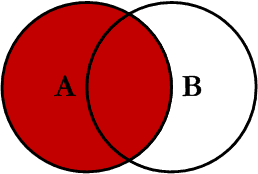

**Right Join**

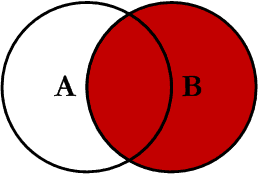

### i. Based on the same key (key with 1 column)

In [182]:
df_1 = pd.read_csv('netflix_titles.csv')
df_2 = pd.read_csv('netflix_titles.csv')

In [183]:
df_1 = df_1[df_1['country'] == 'United States']
df_2 = df_2[df_2['country'] == 'India']

In [184]:
df_1 = df_1[['title', 'release_year']]
df_2 = df_2[['title', 'release_year']]

In [185]:
df_1 = df_1.drop_duplicates(subset = ['release_year'])
df_2 = df_2.drop_duplicates(subset = ['release_year'])

In [186]:
df = df_1.merge(df_2, on = ['release_year'], how = 'left', suffixes = ('_USA', '_India'))

In [187]:
df

,title_USA,release_year,title_India
0,Dick Johnson Is Dead,2020,Shikara
1,The Starling,2021,Kota Factory
2,Grown Ups,2010,"LSD: Love, Sex Aur Dhokha"
3,Dark Skies,2013,Once Upon a Time in Mumbai Dobaara!
4,Jaws,1975,Salaakhen
...,...,...,...
64,The Memphis Belle: A Story of a\nFlying Fortress,1944,NaN
65,The Twilight Zone (Original Series),1963,NaN
66,Thunderbolt,1947,NaN
67,True Grit,1969,Prince


### ii. Based on the same key (key with 2 columns)

In [188]:
df_1 = pd.read_csv('netflix_titles.csv')
df_2 = pd.read_csv('netflix_titles.csv')

In [189]:
df_1 = df_1[df_1['country'] == 'United States']
df_2 = df_2[df_2['country'] == 'India']

In [190]:
df_1 = df_1[['title', 'type', 'release_year']]
df_2 = df_2[['title', 'type', 'release_year']]

In [191]:
df_1 = df_1.drop_duplicates(subset = ['type', 'release_year'])
df_2 = df_2.drop_duplicates(subset = ['type', 'release_year'])

In [192]:
df = df_1.merge(df_2, on = ['type', 'release_year'], how = 'left', suffixes = ('_USA', '_India'))

In [193]:
df

,title_USA,type,release_year,title_India
0,Dick Johnson Is Dead,Movie,2020,Shikara
1,The Starling,Movie,2021,Thimmarusu
2,Dear White People,TV Show,2021,Kota Factory
3,Grown Ups,Movie,2010,"LSD: Love, Sex Aur Dhokha"
4,Dark Skies,Movie,2013,Once Upon a Time in Mumbai Dobaara!
...,...,...,...,...
98,The Twilight Zone (Original Series),TV Show,1963,NaN
99,Thunderbolt,Movie,1947,NaN
100,True Grit,Movie,1969,Prince
101,Undercover: How to Operate Behind Enemy Lines,Movie,1943,NaN


### iii. Based on the different key

In [194]:
df_1 = pd.read_csv('netflix_titles.csv')
df_2 = pd.read_csv('netflix_titles.csv')

In [195]:
df_1 = df_1[df_1['country'] == 'United States']
df_2 = df_2[df_2['country'] == 'India']

In [196]:
df_1 = df_1.groupby(by = ['release_year'], as_index = False)['title'].max()
df_2 = df_2.groupby(by = ['release_year'], as_index = False)['title'].max()

In [197]:
df_1.head()

,release_year,title
0,1942,The Battle of Midway
1,1943,Why We Fight: The Battle of Russia
2,1944,The Negro Soldier
3,1945,San Pietro
4,1946,Pioneers of African-American Cinema


In [198]:
df_2.head()

,release_year,title
0,1959,Ujala
1,1962,Professor
2,1964,Sangam
3,1966,Amrapali
4,1969,Prince


In [199]:
df_1 = df_1.rename(columns = {'release_year': 'release_year_USA'})
df_2 = df_2.rename(columns = {'release_year': 'release_year_India'})

In [200]:
df_1.head()

,release_year_USA,title
0,1942,The Battle of Midway
1,1943,Why We Fight: The Battle of Russia
2,1944,The Negro Soldier
3,1945,San Pietro
4,1946,Pioneers of African-American Cinema


In [201]:
df_2.head()

,release_year_India,title
0,1959,Ujala
1,1962,Professor
2,1964,Sangam
3,1966,Amrapali
4,1969,Prince


In [202]:
df = df_1.merge(df_2, left_on = ['release_year_USA'], right_on = ['release_year_India'], how = 'left', suffixes = ('_USA', '_India'))

In [203]:
df

,release_year_USA,title_USA,release_year_India,title_India
0,1942,The Battle of Midway,NaN,NaN
1,1943,Why We Fight: The Battle of Russia,NaN,NaN
2,1944,The Negro Soldier,NaN,NaN
3,1945,San Pietro,NaN,NaN
4,1946,Pioneers of African-American Cinema,NaN,NaN
...,...,...,...,...
64,2017,Young & Hungry,2017.0,​Mayurakshi
65,2018,Zion,2018.0,​​Kuch Bheege Alfaaz
66,2019,Zac and Mia,2019.0,Watchman
67,2020,You Are My Home,2020.0,Zindagi in Short


# 9. Bonus

In [204]:
df = pd.DataFrame({'date': ['02-01-1996', 'hola'], 'Phrases': ['Yes', 'No']})

In [205]:
df

,date,Phrases
0,02-01-1996,Yes
1,hola,No


### i. Transform column to datetime and if some elements aren't dates, then transform to NaN

In [206]:
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y', errors = 'coerce')

In [207]:
df

,date,Phrases
0,1996-01-02,Yes
1,NaT,No


In [208]:
df.isna().sum()

date       1
Phrases    0
dtype: int64

In [209]:
df = df.dropna()

In [210]:
df

,date,Phrases
0,1996-01-02,Yes


### ii. Assign

In [211]:
df = pd.DataFrame({'numbers_2': [1, 4, 25, 16, 25, 36, 49]})

In [212]:
df

,numbers_2
0,1
1,4
2,25
3,16
4,25
5,36
6,49


In [213]:
df = df.assign(numbers = lambda x: x.numbers_2**(1/2))

In [214]:
df

,numbers_2,numbers
0,1,1.0
1,4,2.0
2,25,5.0
3,16,4.0
4,25,5.0
5,36,6.0
6,49,7.0


In [215]:
df['numbers'] = pd.to_numeric(df['numbers'], errors = 'coerce')

In [216]:
df['numbers'] = df['numbers'].apply(int)

In [217]:
df = df.assign(numbers_ = df['numbers_2']**(1/2))

In [218]:
df

,numbers_2,numbers,numbers_
0,1,1,1.0
1,4,2,2.0
2,25,5,5.0
3,16,4,4.0
4,25,5,5.0
5,36,6,6.0
6,49,7,7.0


### iii. Is duplicates

In [222]:
df = pd.DataFrame({'column_1': [1, 2, 3], 'column_2': [4, 4, 5]})

In [229]:
df

,column_1,column_2
0,1,4
1,2,4
2,3,5


In [231]:
df['column_2'].duplicated()

0    False
1     True
2    False
Name: column_2, dtype: bool

You can see that the method mark only one value of all duplicated value as duplicated

In [233]:
df[df['column_2'].duplicated() == False]

,column_1,column_2
0,1,4
2,3,5


### iv. Astypes

In [234]:
df

,column_1,column_2
0,1,4
1,2,4
2,3,5


In [235]:
df['column_1']

0    1
1    2
2    3
Name: column_1, dtype: int64

In [237]:
df = df.astype({'column_1': 'object', 'column_2': 'object'})

In [238]:
df['column_1']

0    1
1    2
2    3
Name: column_1, dtype: object

### iv. np insert

In [247]:
x = np.array([[1, 2], [3, 4], [5, 6]])

In [248]:
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [249]:
x = np.insert(x, [1], [[7],[8],[9]], axis=1)

In [250]:
x

array([[1, 7, 2],
       [3, 8, 4],
       [5, 9, 6]])

In [251]:
x = np.insert(x, 2, 10, axis = 1)

In [252]:
x

array([[ 1,  7, 10,  2],
       [ 3,  8, 10,  4],
       [ 5,  9, 10,  6]])

In [253]:
y = x.flatten()

In [254]:
y

array([ 1,  7, 10,  2,  3,  8, 10,  4,  5,  9, 10,  6])

### v. Pivot and Melt

In [255]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [256]:
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [260]:
pivot_table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc=np.sum, fill_value=0)

In [261]:
pivot_table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [266]:
melt_table = pd.melt(df, id_vars = ['A', 'B', 'C'], value_vars = ['D'])

In [267]:
melt_table

,A,B,C,variable,value
0,foo,one,small,D,1
1,foo,one,large,D,2
2,foo,one,large,D,2
3,foo,two,small,D,3
4,foo,two,small,D,3
5,bar,one,large,D,4
6,bar,one,small,D,5
7,bar,two,small,D,6
8,bar,two,large,D,7


### vi. ZIP

In [281]:
languages = ['Java', 'Python', 'JavaScript']
versions = [14, 3, 6]

In [285]:
result = dict(zip(languages, versions))

In [288]:
result

{'Java': 14, 'Python': 3, 'JavaScript': 6}